In [1]:
from Models import Perceptron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('linear.csv')
df

,0,1,y
0,8.767747,3.995108,0
1,5.938750,5.387562,0
2,8.605291,-2.652032,1
3,7.488204,5.810372,0
4,7.653939,4.499167,0
...,...,...,...
995,7.211895,7.904023,0
996,8.974970,-3.063078,1
997,7.324660,6.607004,0
998,6.889562,4.775597,0


In [3]:
train_df = df.sample(frac=0.8)      # also shuffles
test_df = df.drop(train_df.index)   # also shuffles


train_df, test_df

(             0         1  y
 772   9.591094 -2.012123  1
 329   6.872640 -3.449563  1
 424   8.594897 -2.185127  1
 736   9.195360 -1.303865  1
 828  10.504296 -1.826556  1
 ..         ...       ... ..
 881   8.819114  0.455576  1
 484   8.780102 -2.990194  1
 316   8.130243 -1.089040  1
 169   8.304482 -2.528157  1
 237   8.179533 -3.777860  1
 
 [800 rows x 3 columns],
             0         1  y
 7    8.647269 -2.477870  1
 8    7.821450 -1.686046  1
 10   8.249359  6.295438  0
 12   7.746612 -3.088087  1
 20   9.032440 -3.525806  1
 ..        ...       ... ..
 956  6.353969  7.710437  0
 959  7.245715  5.217406  0
 969  6.239564  6.075306  0
 974  5.241834  4.712351  0
 993  7.098063 -2.228558  1
 
 [200 rows x 3 columns])

In [4]:
train_inputs = train_df[['0', '1']].values
train_labels = train_df['y'].values

test_inputs = test_df[['0', '1']].values
test_labels = test_df['y'].values

In [5]:
model = Perceptron(input_size=2)

In [6]:
model.train(train_inputs, train_labels, epochs=10, learning_rate=0.1)

Epoch: 0, Error: 7
Epoch: 1, Error: 0
Epoch: 2, Error: 0
Epoch: 3, Error: 0
Epoch: 4, Error: 0
Epoch: 5, Error: 0
Epoch: 6, Error: 0
Epoch: 7, Error: 0
Epoch: 8, Error: 0
Epoch: 9, Error: 0
[ 0.1         0.42527009 -1.81952028]


In [7]:
predicted = model.predict(test_inputs)
print("Error:", np.count_nonzero(predicted - test_labels))

Error: 0


1 [ 0.1         0.42527009 -1.81952028]


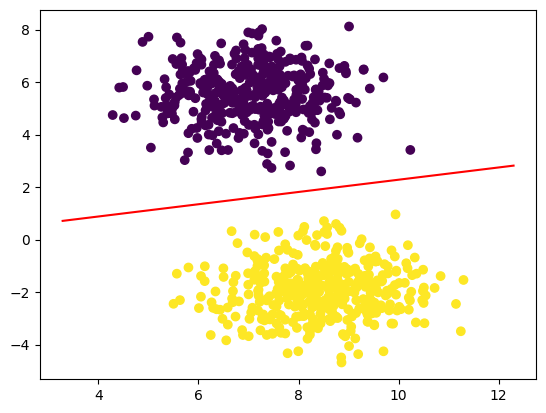

In [8]:
plt.scatter(train_inputs[:,0], train_inputs[:,1], c=train_labels)
x = np.linspace(train_inputs[:,0].min() - 1, train_inputs[:,0].max() + 1, 100)

w = model.get_weights()
b = model.get_bias()

y = [-w[1] * i + w[0] * b for i in x] / w[2]
print(b, w)
plt.plot(x, y, '-r')
plt.show()